In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
# plt.rcParams.keys()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

#### Observations:

age, bmi and smoker all three are highly correlated with output variable charges.
sex and region do not have significant impact on output variable charges. </font>

#### Convert categorical variable to numeric

In [5]:
df = pd.get_dummies(data=df, columns=['smoker','sex'], drop_first=True)

In [6]:
df.head()

,age,bmi,children,region,charges,smoker_yes,sex_male
0,19,27.900,0,southwest,16884.92400,1,0
1,18,33.770,1,southeast,1725.55230,0,1
2,28,33.000,3,southeast,4449.46200,0,1
3,33,22.705,0,northwest,21984.47061,0,1
4,32,28.880,0,northwest,3866.85520,0,1


### Multiple Linear Regression

In [8]:
output_df = pd.DataFrame(columns=['MAE','MSE','R2-Score'],index=['Linear Regression','Multiple Linear Regression','Polynomial Regression','Polynomial Regression(Normalized-X)'])


In [9]:
x=df[['age','bmi','smoker_yes']]
y=df[['charges']]
lr = linear_model.LinearRegression()
lr_model = lr.fit(x, y)

predictions = lr_model.predict(x)
df['mlr_result'] = predictions

mlr_error = y - predictions
df['mlr_error'] = mlr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y.values) ** 2))
print("R2-score: %.2f" % r2_score(y.values , predictions) )

output_df['MAE']['Multiple Linear Regression'] = np.mean(np.absolute(predictions - y.values))
output_df['MSE']['Multiple Linear Regression'] = np.mean((predictions - y.values) ** 2)
output_df['R2-Score']['Multiple Linear Regression'] = r2_score(y.values , predictions)

Slope:  [[  259.54749155   322.61513282 23823.68449531]]
Intercept:  [-11676.83042519]
Mean absolute error: 4216.78
Residual sum of squares (MSE): 37005395.75
R2-score: 0.75


In [17]:
print('length of x:',len(x))
print('length of y:',len(y))


print(df)

length of x: 1338
length of y: 1338
      age     bmi  children     region      charges  smoker_yes  sex_male  \
0      19  27.900         0  southwest  16884.92400           1         0   
1      18  33.770         1  southeast   1725.55230           0         1   
2      28  33.000         3  southeast   4449.46200           0         1   
3      33  22.705         0  northwest  21984.47061           0         1   
4      32  28.880         0  northwest   3866.85520           0         1   
...   ...     ...       ...        ...          ...         ...       ...   
1333   50  30.970         3  northwest  10600.54830           0         1   
1334   18  31.920         0  northeast   2205.98080           0         0   
1335   18  36.850         0  southeast   1629.83350           0         0   
1336   21  25.800         0  southwest   2007.94500           0         0   
1337   61  29.070         0  northwest  29141.36030           1         0   

        mlr_result     mlr_error  
0   

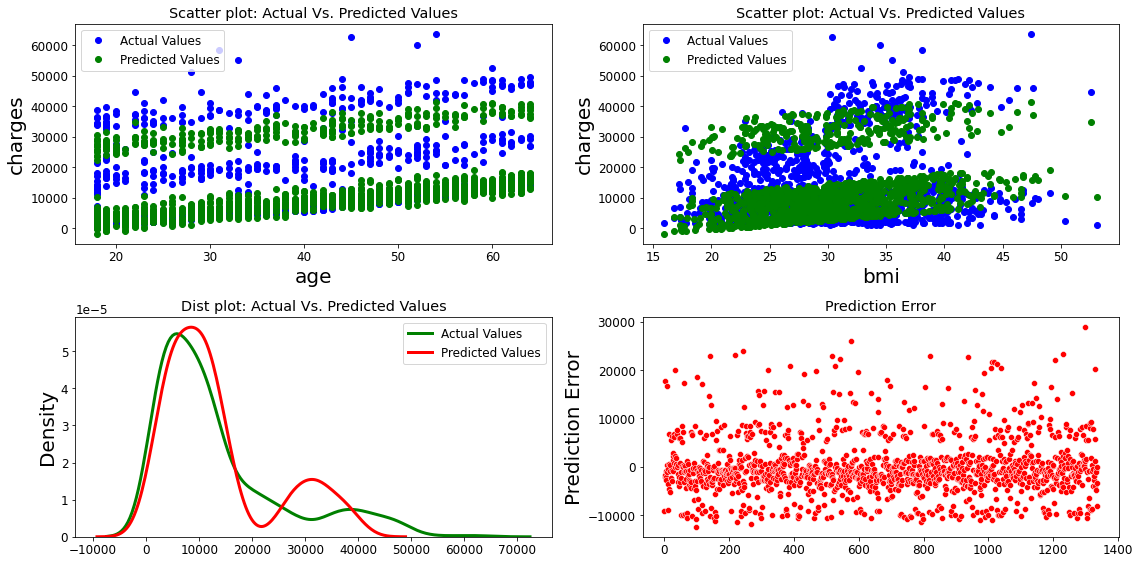

In [10]:
fig, axes =plt.subplots(2,2, figsize=(16,8))
axes[0][0].plot(x['age'], y,'bo',label='Actual Values')
axes[0][0].plot(x['age'], predictions,'go',label='Predicted Values')
axes[0][0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][0].set_xlabel("age")
axes[0][0].set_ylabel("charges")
axes[0][0].legend()

axes[0][1].plot(x['bmi'], y,'bo',label='Actual Values')
axes[0][1].plot(x['bmi'], predictions,'go',label='Predicted Values')
axes[0][1].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][1].set_xlabel("bmi")
axes[0][1].set_ylabel("charges")
axes[0][1].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1][0])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1][0])
axes[1][0].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1][0].legend()

sns.scatterplot(x=y.index,y='mlr_error',data=df,color="r", ax=axes[1][1])
axes[1][1].set_title("Prediction Error")
axes[1][1].set_ylabel("Prediction Error")

fig.tight_layout()